Pertemuan 6 - Organisasi dan Analisis Dataset



ERIK RAHMAN 22346005





## 1. Feature Engineering: definisi, teknik, dan implementasi
Feature engineering adalah proses di mana kita menggunakan pengetahuan domain untuk membuat fitur-fitur baru yang lebih informatif dari data mentah (raw data) yang ada. Tujuannya adalah untuk meningkatkan kualitas data yang digunakan dalam model machine learning, sehingga model dapat membuat prediksi yang lebih akurat.

##### Teknik Feature Engineering:
1. Penggabungan Fitur (Feature Combination): Menggabungkan beberapa fitur untuk menciptakan fitur baru yang lebih informatif. Contohnya, dalam data geospasial, bisa digabungkan koordinat latitude dan longitude menjadi fitur jarak atau fitur lain yang lebih bermakna.
2. Pengurangan Dimensi (Dimensionality Reduction): Mengurangi jumlah fitur dalam dataset dengan teknik seperti Principal Component Analysis (PCA) atau t-SNE untuk menghilangkan fitur yang kurang relevan atau redundan.
3. Penambahan Informasi (Feature Augmentation): Menambahkan informasi tambahan ke dalam dataset, misalnya menambahkan fitur tanggal menjadi hari kerja atau hari libur, yang dapat memberikan wawasan tambahan pada model.
4. Transformasi Fitur (Feature Transformation): Mengubah skala atau distribusi dari fitur untuk memperbaiki kinerja model. Contoh umumnya adalah normalisasi atau transformasi logaritmik.
5. Seleksi Fitur (Feature Selection): Memilih subset fitur yang paling penting atau relevan untuk meningkatkan performa model. Teknik seperti chi-square, information gain, atau recursive feature elimination (RFE) digunakan untuk seleksi fitur.
6. Encoding Kategori (Category Encoding): Mengubah variabel kategori menjadi bentuk yang dapat dimengerti oleh model, seperti menggunakan teknik one-hot encoding atau label encoding.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Contoh dataset
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Boston', 'Miami'],
    'Temperature': [25, 30, 22, 18, 28],
    'Category': ['A', 'B', 'A', 'C', 'B']
}
df = pd.DataFrame(data)

# Contoh 1: Encoding kategori
encoder = OneHotEncoder(sparse_output=False)
encoded_category = encoder.fit_transform(df[['Category']])

# Contoh 2: Transformasi fitur numerik
scaler = StandardScaler()
scaled_temperature = scaler.fit_transform(df[['Temperature']])

# Contoh 3: Penggabungan fitur
df['City_Temperature'] = df['City'] + '_' + df['Temperature'].astype(str)

# Contoh 4: Pengurangan dimensi dengan PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(encoded_category)

# Contoh 5: Ekstraksi fitur teks dengan TF-IDF
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
    'The last document is different.'
]  # Menambah 1 elemen agar sesuai dengan jumlah label
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Memisahkan fitur dan label, dan membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)

# Contoh menggunakan model machine learning setelah feature engineering
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.0


Dalam contoh di atas:
Kode ini menerapkan beberapa teknik Feature Engineering untuk mempersiapkan data sebelum digunakan dalam model Machine Learning. Pertama, data didefinisikan dalam bentuk DataFrame yang berisi informasi mengenai kota, suhu, dan kategori tertentu. Untuk menangani data kategori, dilakukan One-Hot Encoding yang mengubah kategori menjadi representasi numerik biner agar dapat digunakan dalam model. Selain itu, data numerik seperti suhu dinormalisasi menggunakan StandardScaler agar memiliki distribusi dengan mean 0 dan variance 1, sehingga model tidak bias terhadap nilai besar atau kecil.

Selanjutnya, dilakukan penggabungan fitur dengan cara mengkombinasikan nama kota dan suhu menjadi satu fitur baru untuk memberikan informasi tambahan kepada model. Untuk mengurangi dimensi fitur kategori yang telah dienkode, digunakan PCA (Principal Component Analysis) yang mengubah data berdimensi tinggi menjadi dimensi yang lebih rendah, sehingga mengurangi kompleksitas perhitungan tanpa kehilangan informasi yang signifikan. Selain itu, jika data berupa teks, fitur diekstraksi menggunakan TF-IDF (Term Frequency-Inverse Document Frequency) untuk mengubah teks menjadi vektor numerik berdasarkan kepentingan kata dalam dokumen.

Setelah preprocessing, data dibagi menjadi training set dan testing set menggunakan train_test_split dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian. Model Random Forest Classifier kemudian dilatih menggunakan data training, dan setelah pelatihan selesai, dilakukan prediksi terhadap data testing. Evaluasi model dilakukan dengan menghitung akurasi menggunakan accuracy_score untuk mengukur seberapa baik model dalam melakukan klasifikasi. Dengan menerapkan berbagai teknik Feature Engineering ini, model dapat bekerja lebih efektif dalam memahami pola dalam data dan menghasilkan prediksi yang lebih akurat.

Feature engineering adalah langkah penting dalam pengembangan model machine learning yang dapat meningkatkan performa model dengan memanfaatkan informasi tambahan atau lebih relevan dari dataset yang tersedia.

## 2. Data Augmentation
Data augmentation adalah teknik yang digunakan untuk meningkatkan variasi dataset dengan membuat salinan data yang dimodifikasi dari data asli. Tujuan utamanya adalah untuk memperluas dataset yang tersedia tanpa mengumpulkan lebih banyak data, yang dapat membantu mengurangi overfitting dan meningkatkan generalisasi model.

#### Tujuan Data Augmentation
1. Meningkatkan Keanekaragaman Data: Dengan membuat variasi data yang lebih besar, model dapat mempelajari pola yang lebih umum dan lebih baik dalam data yang belum pernah dilihat sebelumnya.
2. Mengurangi Overfitting: Dengan menggunakan augmentasi, kita dapat mengurangi risiko model mempelajari detail yang spesifik dari data pelatihan yang mungkin tidak relevan untuk data baru.
3. Memperbaiki Kinerja Model: Dengan dataset yang lebih besar dan lebih bervariasi, kita dapat meningkatkan performa model dalam tugas-tugas seperti klasifikasi gambar atau teks.

#### Teknik Data Augmentation
##### Data Augmentation Gambar
- Rotasi: Memutar gambar dalam berbagai sudut.
- Flip: Membalikkan gambar secara horizontal atau vertikal.
- Zoom: Memperbesar atau memperkecil bagian-bagian gambar.
- Pergeseran: Memindahkan gambar ke arah horizontal atau vertikal.
- Cropping: Memotong bagian dari gambar.

##### Implementasi menggunakan imgaug (Python):
imgaug adalah pustaka Python yang kuat untuk augmentasi gambar dengan berbagai teknik. Berikut adalah contoh penggunaan imgaug untuk melakukan beberapa teknik augmentasi gambar:

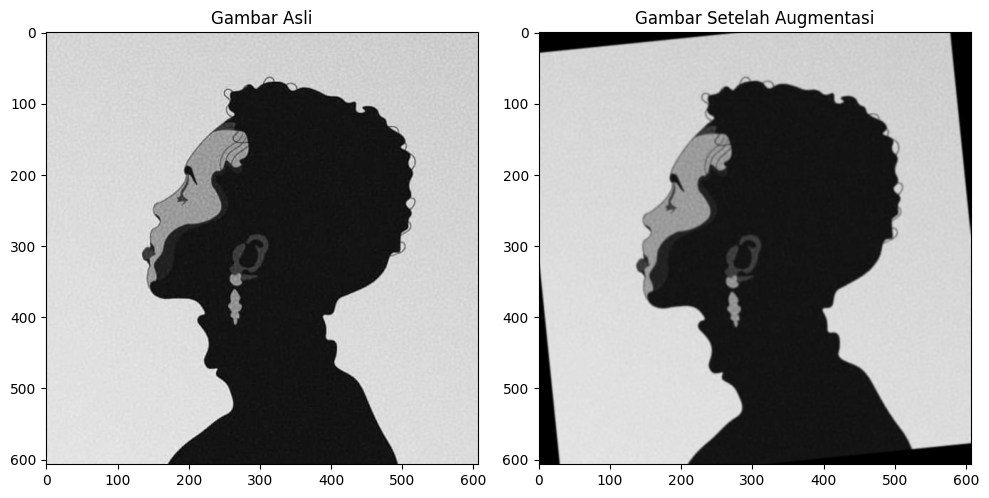

In [9]:
import numpy as np
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
from PIL import Image

# Contoh gambar
image = np.array(Image.open('example_image.jpeg'))

# Definisi augmentor
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontal dengan peluang 50%
    iaa.Affine(rotate=(-10, 10)),  # Rotasi gambar dalam rentang -10 sampai 10 derajat
    iaa.GaussianBlur(sigma=(0, 1.0))  # Blur Gaussian dengan sigma antara 0 dan 1.0
])

# Augmentasi gambar
augmented_image = seq(image=image)

# Tampilkan hasil augmentasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Gambar Setelah Augmentasi')

plt.tight_layout()
plt.show()


##### Data Augmentation Teks
- Pertambahan Kata (Word Insertion): Menambahkan kata-kata baru ke dalam teks.
- Penggantian Kata (Word Replacement): Mengganti kata-kata dengan sinonim atau kata-kata yang serupa.
- Pemotongan Kata (Word Truncation): Memotong atau menghapus kata-kata dari teks.
- Pengacakan Urutan Kata (Word Reordering): Mengacak urutan kata dalam teks.

Kode ini bertujuan untuk melakukan augmentasi pada sebuah gambar menggunakan pustaka imgaug dan menampilkannya dengan Matplotlib. Pertama, pustaka NumPy, imgaug, Matplotlib, dan PIL diimpor untuk membantu dalam manipulasi dan visualisasi gambar. Kemudian, gambar dengan nama example_image.jpeg dibuka menggunakan PIL, dikonversi menjadi array NumPy, dan disimpan dalam variabel image. Selanjutnya, sebuah pipeline augmentasi dibuat menggunakan iaa.Sequential(), yang berisi tiga jenis augmentasi: flipping horizontal dengan probabilitas 50%, rotasi dalam rentang -10 hingga 10 derajat, serta Gaussian blur dengan nilai sigma antara 0 hingga 1. Setelah augmentasi diterapkan pada gambar, hasilnya disimpan dalam variabel augmented_image. Terakhir, gambar asli dan hasil augmentasi ditampilkan berdampingan menggunakan Matplotlib, dengan subplot pertama untuk gambar asli dan subplot kedua untuk gambar yang telah dimodifikasi.

#### Implementasi menggunakan TextBlob (Python):
TextBlob adalah pustaka Python yang memudahkan analisis teks dengan menyediakan akses mudah ke operasi linguistik. Berikut adalah contoh penggunaan TextBlob untuk beberapa teknik augmentasi teks:

In [15]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [16]:
from textblob import TextBlob
import random

# Contoh teks
text = "Ini adalah contoh kalimat untuk augmentasi teks."

# Objek TextBlob untuk teks
blob = TextBlob(text)

# Pertambahan kata
augmented_text = blob.words + ['baru', 'kata']

# Penggantian kata acak
for i in range(len(blob.words)):
    if random.random() < 0.3:  # Probabilitas 30% untuk penggantian kata
        augmented_text[i] = 'kata_baru'

# Konversi kembali ke teks
augmented_text = ' '.join(augmented_text)

print("Teks Asli:", text)
print("Teks Setelah Augmentasi:", augmented_text)


Teks Asli: Ini adalah contoh kalimat untuk augmentasi teks.
Teks Setelah Augmentasi: Ini adalah contoh kalimat untuk augmentasi teks baru kata


Kode ini menggunakan TextBlob dan random untuk melakukan augmentasi teks dengan menambahkan dan mengganti kata secara acak.

Pertama, kode mendefinisikan sebuah teks contoh (text) dan mengonversinya menjadi objek TextBlob (blob), yang memudahkan pemrosesan teks seperti tokenisasi kata. Selanjutnya, kode menambahkan dua kata baru ('baru' dan 'kata') ke dalam daftar kata dari teks asli.

Kemudian, dalam loop yang berjalan melalui setiap kata dalam teks, terdapat peluang 30% (random.random() < 0.3) untuk mengganti kata dengan 'kata_baru'. Setelah itu, daftar kata yang telah dimodifikasi dikonversi kembali menjadi teks menggunakan join().

Terakhir, kode mencetak teks asli dan teks yang telah mengalami augmentasi untuk melihat perbedaannya. Tujuan utama dari kode ini adalah untuk melakukan augmentasi data teks, yang berguna dalam pemrosesan bahasa alami (NLP) untuk memperkaya dataset pelatihan model.

Data augmentation adalah teknik yang sangat berguna dalam machine learning untuk meningkatkan variasi dan kualitas dataset, baik dalam konteks gambar maupun teks. Dengan mengimplementasikan teknik-teknik ini, kita dapat memperluas dataset yang tersedia, mengurangi overfitting, dan meningkatkan performa model dalam berbagai tugas machine learning.

## 3. Normalisasi Data
Normalisasi data adalah proses mengubah nilai-nilai dalam dataset sehingga memiliki skala yang seragam. Tujuannya adalah untuk menghindari dominasi oleh fitur-fitur dengan skala besar dan memastikan setiap fitur memiliki kontribusi yang seimbang terhadap hasil akhir model.


#### Implementasi menggunakan Scikit-Learn

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Contoh dataset
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# 1. Min-Max Scaling (Normalization)
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data)

print("Min-Max Scaled Data:")
print(data_minmax_scaled)
print()

# 2. Z-Score Normalization (Standardization)
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data)

print("Z-Score Standardized Data:")
print(data_standard_scaled)


Min-Max Scaled Data:
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]

Z-Score Standardized Data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


Dalam contoh di atas, data_minmax_scaled dan data_standard_scaled adalah hasil dari normalisasi data menggunakan Min-Max Scaling dan Z-Score Normalization, masing-masing. Hasilnya dapat digunakan sebagai input untuk model machine learning untuk memastikan setiap fitur memiliki pengaruh yang setara terhadap hasil akhir model. Dengan menggunakan teknik normalisasi, kita dapat mempersiapkan data dengan cara yang optimal untuk berbagai jenis model machine learning, meningkatkan interpretabilitas, konvergensi, dan performa model secara keseluruhan.

## 4. Ensemble Methods
Ensemble Methods adalah teknik dalam machine learning di mana beberapa model (yang disebut "learners" atau "base models") digabungkan bersama untuk meningkatkan kinerja prediksi secara keseluruhan. Ide dasarnya adalah bahwa gabungan dari beberapa model yang berbeda sering kali lebih baik daripada model individu yang digunakan secara terpisah.

### Jenis Ensemble Methods
1. Bagging (Bootstrap Aggregating): Menggunakan beberapa dataset bootstrap (sampel acak dengan penggantian dari dataset pelatihan) untuk melatih beberapa model serentak. Contoh: Random Forest.
2. Boosting: Mengurangi bias model dengan memusatkan perhatian pada data yang salah diperkirakan oleh model sebelumnya. Contoh: AdaBoost, Gradient Boosting Machines (GBM), XGBoost, LightGBM
3. Stacking (Stacked Generalization): Menggabungkan output dari beberapa model berbeda sebagai input untuk model meta-learner (model yang lebih tinggi). Contoh: Menggunakan hasil prediksi dari SVM, Random Forest, dan Neural Network sebagai input untuk model klasifikasi logistic regression.

#### Implementasi Ensemble Methods
Berikut adalah contoh implementasi ensemble methods menggunakan Python dengan scikit-learn:

In [18]:
# Contoh dengan Random Forest (Bagging):
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prediksi menggunakan model yang sudah dilatih
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


In [19]:
# Contoh dengan AdaBoost (Boosting)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model AdaBoost
clf = AdaBoostClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Prediksi menggunakan model yang sudah dilatih
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


#### Keunggulan Ensemble Methods:
1. Meningkatkan Kinerja: Ensemble methods sering kali menghasilkan performa yang lebih baik daripada model tunggal karena mampu mengurangi varians (overfitting) dan meningkatkan akurasi prediksi.
2. Stabilitas: Mengurangi risiko kesalahan yang disebabkan oleh variasi dalam dataset pelatihan atau noise.
3. Fleksibilitas: Dapat digunakan dengan berbagai jenis model dasar, memungkinkan untuk mengkombinasikan kekuatan dari berbagai pendekatan pemodelan.

## 5. Identifikasi Pola dan Tren
Identifikasi pola dan tren merupakan bagian penting dalam analisis data, terutama dalam konteks analisis time series atau dataset yang mengandung data kronologis. Pola dan tren mencerminkan perilaku atau perubahan dalam data dari waktu ke waktu, yang dapat memberikan wawasan berharga untuk pengambilan keputusan atau prediksi masa depan. Berikut adalah cara umum untuk mengidentifikasi pola dan tren dalam data.

#### Identifikasi Pola
1. Visualisasi Data: Gunakan grafik seperti line plot, scatter plot, atau histogram untuk memvisualisasikan data. Pola dapat terlihat sebagai pengelompokan data, pola siklus, atau pola lain yang menunjukkan hubungan antara variabel.
2. Analisis Deskriptif: Hitung statistik deskriptif seperti mean, median, dan mode untuk memahami distribusi data. Pola bisa terlihat sebagai pola konsentrasi nilai di sekitar nilai tengah atau pola distribusi yang asimetris.
3. Analisis Cluster: Gunakan teknik clustering seperti k-means untuk mengidentifikasi kelompok data yang serupa. Pola mungkin muncul sebagai kelompok data yang terpisah dengan karakteristik yang berbeda-beda.


#### Identifikasi Tren
1. Trendline: Buat trendline atau garis tren menggunakan metode seperti regresi linier. Tren dapat terlihat sebagai pola umum dari data yang menunjukkan arah pergerakan yang jelas ke atas (tren naik), ke bawah (tren turun), atau datar (tren stabil).
2. Moving Average: Gunakan moving average untuk meratakan fluktuasi jangka pendek dan menyoroti tren jangka panjang. Tren bisa terlihat sebagai kecenderungan nilai rata-rata yang berubah dari waktu ke waktu.
3. Decomposition: Lakukan dekomposisi time series untuk memisahkan data menjadi komponen tren, musiman, dan residual. Tren dapat terlihat sebagai komponen yang menunjukkan perubahan sistematis dari waktu ke waktu.

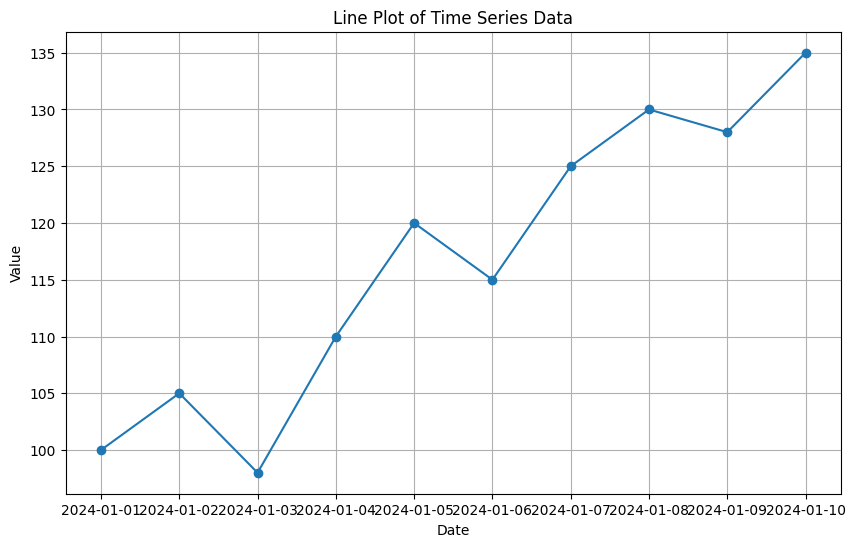

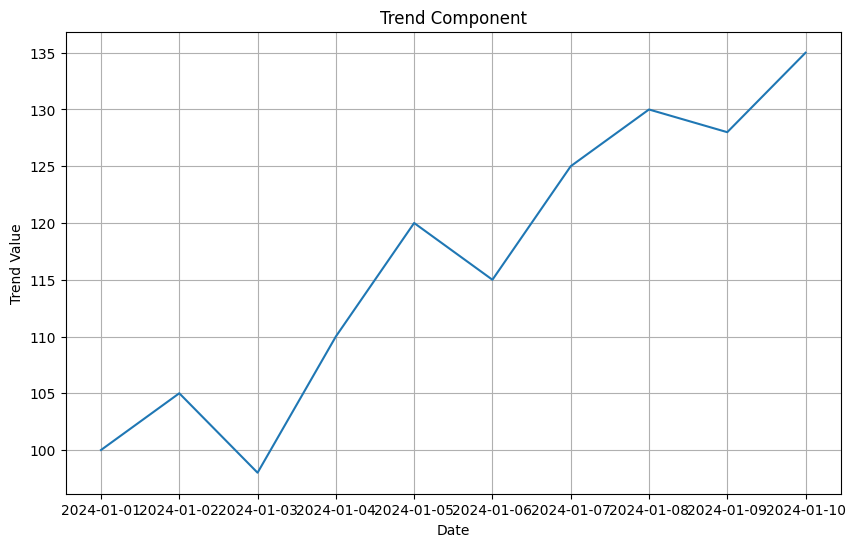

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load data from CSV
data = pd.read_csv('contoh-data.csv', parse_dates=['date'], index_col='date')

# Visualize data with line plot
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], marker='o', linestyle='-')
plt.title('Line Plot of Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Decompose time series data
result = seasonal_decompose(data['value'], model='additive', period=1)

# Visualize trend component
plt.figure(figsize=(10, 6))
plt.plot(result.trend)
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend Value')
plt.grid(True)
plt.show()

Dengan menjalankan script ini, Anda akan melihat visualisasi pola dan tren dari data yang ada dalam data.csv. Pastikan untuk menginstal library yang diperlukan seperti Pandas, Matplotlib, dan statsmodels jika belum terinstal di lingkungan Python Anda (pip install pandas matplotlib statsmodels).

#### Contoh Kasus NLP: Analisis Sentimen Sederhana
Kita akan membuat sebuah contoh kasus di mana kita akan melakukan analisis sentimen terhadap ulasan film. Kita akan menggunakan dataset yang sudah disediakan oleh NLTK dan menghitung nilai positif atau negatif dari setiap ulasan.

In [22]:
!pip install nltk

In [23]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download dataset movie_reviews jika belum ada
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Ambil dataset ulasan film dari NLTK
reviews = []
for fileid in movie_reviews.fileids():
    review = movie_reviews.raw(fileid)
    reviews.append(review)

# Ambil contoh ulasan
sample_review = reviews[0]

# Tokenisasi kata-kata dalam ulasan
tokens = word_tokenize(sample_review)

# Hilangkan stop words (kata-kata umum yang tidak memiliki makna penting)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Analisis sentimen menggunakan VADER (Valence Aware Dictionary and sEntiment Reasoner)
sid = SentimentIntensityAnalyzer()
sentiment_score = sid.polarity_scores(sample_review)

# Tampilkan hasil
print("Contoh Ulasan Film:")
print(sample_review)
print("\nTokenisasi Kata-kata:")
print(tokens[:20])  # Tampilkan 20 token pertama
print("\nTokenisasi Kata-kata setelah filtering Stop Words:")
print(filtered_tokens[:20])  # Tampilkan 20 token pertama setelah filtering stop words
print("\nAnalisis Sentimen:")
print(sentiment_score)


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Contoh Ulasan Film:
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience